<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification using Convolutional Neural Networks**

A Convolutional Neural Network (CNN or ConvNet) is a deep learning algorithm commonly used for processing and analyzing visual data, such as images and videos. The key feature of a CNN is the use of convolutional layers. These layers apply filters to small regions of the input image, producing a set of feature maps that capture different aspects of the input image. The filters are learned during training, and the resulting feature maps are combined and processed further by subsequent layers.

Convolutional layers are typically followed by pooling layers, which reduce the dimensionality of the feature maps by selecting the most important information in each region. This helps to reduce the computational complexity of the network and prevent overfitting.

The output of the convolutional and pooling layers is typically flattened and fed into one or more fully connected layers, which perform the final classification or regression task.

# **CNN implementation in Keras**

Convolutional Neural Network (CNN) implementation on the MNIST dataset using Keras: This implementation defines a CNN with two convolutional layers, two max pooling layers, and two dropout layers. 

**Step 1:** Import the necessary libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt

**Step 2:** Load the MNIST dataset

The MNIST dataset consists of 28x28 grayscale images of handwritten digits, and the task is to classify them into one of the 10 digits (0-9).

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


We use Matplotlib to display the first 9 images in the MNIST training set. The cmap='gray' argument is used to display the images in grayscale. The labels of the images are also displayed as titles using the set_title function.

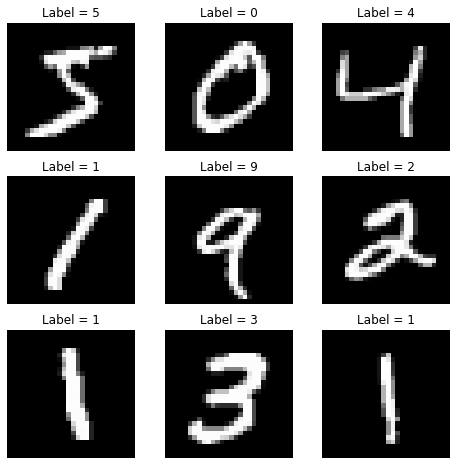

In [ ]:
# Plot the first 9 images in the training set
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes = axes.ravel()
for i in range(9):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label = %d' % y_train[i])
plt.show()

**Step 3:** Preprocess the data

In [ ]:
# Reshape the images to 4D tensors with shape (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert the data type to float32 and scale the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Step 4:** Define the model architecture

In [ ]:
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add the second convolutional layer with 64 filters, a 3x3 kernel size, and ReLU activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add the first max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add another dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 neurons (one for each class) and softmax activation function
model.add(Dense(10, activation='softmax'))

**Step 5:** Compile the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

**Step 6:** Train the model

Here, we use a batch size of 128 and train the model for 12 epochs, with the validation data used for evaluating the model after each epoch.

We train the model using the fit method and store the training history in the history variable. Finally, we use Matplotlib to plot the accuracy vs epoch for both the training and test sets. The history.history attribute contains a dictionary of the training and validation loss and accuracy at each epoch. We access the accuracy values using the keys 'accuracy' and 'val_accuracy'. The legend function is used to display the legend in the upper left corner of the plot.

Epoch 1/12
469/469 [==============================] - 13s 10ms/step - loss: 0.2259 - accuracy: 0.9325 - val_loss: 0.0551 - val_accuracy: 0.9815
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.1189 - accuracy: 0.9650 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 3/12
469/469 [==============================] - 5s 11ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.0464 - val_accuracy: 0.9858
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.1032 - accuracy: 0.9700 - val_loss: 0.0554 - val_accuracy: 0.9845
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0907 - accuracy: 0.9728 - val_loss: 0.0468 - val_accuracy: 0.9847
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0916 - accuracy: 0.9726 - val_loss: 0.0467 - val_accuracy: 0.9869
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0882 - accuracy: 0.9743 - val_loss: 0.0562 - val_accuracy: 0.9837
Epo

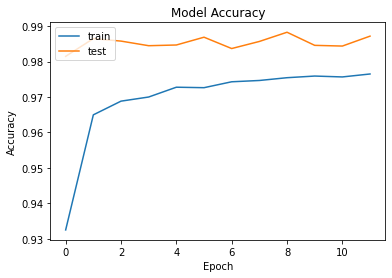

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

# Plot the accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Step 7:** Evaluate the model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04470949247479439
Test accuracy: 0.9872000217437744


# **CNN implementation in PyTorch**

**Step 1:** Import the required libraries and dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

# Load the CIFAR-10 dataset and apply the transformations
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size,
                                           shuffle=True, num_workers=2)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Display some training images

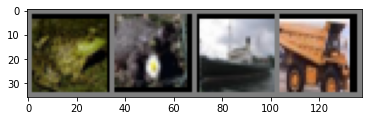

frog  frog  ship  truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**Step 2:** Define the CNN model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.relu3 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

**Step 3:** Define the loss function and optimizer

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

**Step 4:** Train the model

We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.029
[1,  4000] loss: 1.743
[1,  6000] loss: 1.596
[1,  8000] loss: 1.523
[1, 10000] loss: 1.431
[1, 12000] loss: 1.374
[2,  2000] loss: 1.299
[2,  4000] loss: 1.280
[2,  6000] loss: 1.225
[2,  8000] loss: 1.187
[2, 10000] loss: 1.153
[2, 12000] loss: 1.123
Finished Training


**Step 5:** Test the model

Display images from the test set

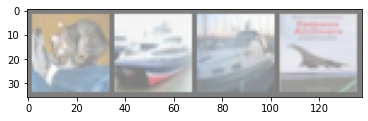

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Let us see what the model thinks these examples above are:

In [ ]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  plane ship  plane ship 


Let us look at how the network performs on the whole dataset

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 27 %


# **CNN implementation in TensorFlow**

This code defines a simple CNN model with two convolutional layers followed by max pooling, a flattening layer, and two fully connected layers. The input images are normalized and reshaped to have a channel dimension of 1 (for grayscale images). The model is compiled with the Adam optimizer and the sparse categorical cross-entropy loss function, and trained for 5 epochs.

After training, the model is evaluated on the test data and the test accuracy is printed. Note that the accuracy achieved may vary based on the random initialization of the model and the training data.

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 54s 28ms/step - loss: 0.1008 - accuracy: 0.9692 - val_loss: 0.0318 - val_accuracy: 0.9891
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0268 - val_accuracy: 0.9907
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0351 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0396 - val_accuracy: 0.9918
E

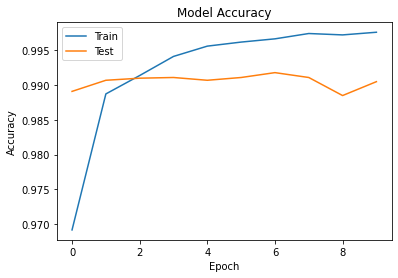

1/1 [==============================] - 0s 22ms/step


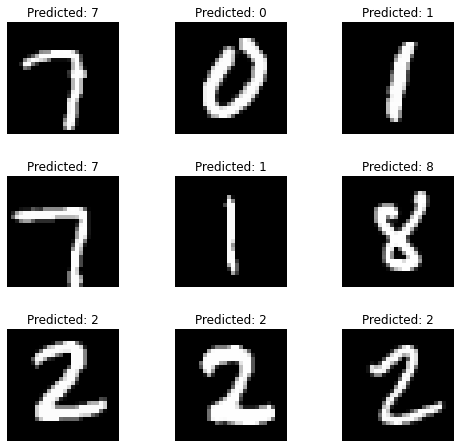

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the input data to add a channel dimension (required for CNN)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model
model = tf.keras.models.Sequential([
  layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
  layers.Conv2D(64, (5,5), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model and get history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Display the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Display some sample images from the dataset
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
ax = ax.ravel()

for i in range(9):
    img_index = np.random.randint(0, len(x_test))
    img = x_test[img_index]
    ax[i].imshow(img.squeeze(), cmap='gray')
    pred = model.predict(np.expand_dims(img, axis=0)).argmax()
    ax[i].set_title("Predicted: {}".format(pred))
    ax[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

**Model Summary and Plot**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)             

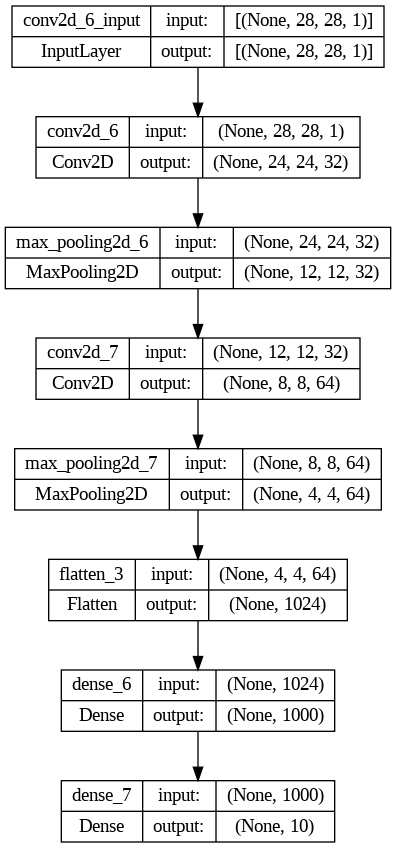

In [ ]:
model.summary()

#Plot the model
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)